<a href="https://www.kaggle.com/code/usmandatalab/world-class-life-expectancy-analytics?scriptVersionId=290780270" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Global Life Expectancy Analytics

This notebook performs advanced data analytics, visualization, and machine learning on the Gapminder Life Expectancy dataset. 
The goal is to provide actionable insights and world-class visual presentation. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Set global style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

import warnings
warnings.filterwarnings('ignore')



All necessary Libararies Imported successfully 

In [ ]:
df = pd.read_csv("/kaggle/input/gapminder-life-expectancy-at-birth/gapminder_life_expectancy.csv")
df.head()
df_numeric = df.select_dtypes(include=[np.number])
df_numeric = df_numeric.replace([np.inf, -np.inf], np.nan)
df_numeric.describe()


Operation 1: Data Info & Description
============================

Basic dataset structure, number of rows/columns, column types, and summary statistics. """

In [ ]:
df.info()
df.describe()

# Operation 2: Missing Values Check

Ensuring data quality by checking for null/missing values. """

In [ ]:
df.isnull().sum()

# **Operation 3: Histogram of Life Expectancy**# 

Histogram showing how life expectancy values are distributed across countries. """

In [ ]:
# Get latest year column dynamically
latest_year = df.columns[-1]  # last column, e.g., '2100'
plt.figure(figsize=(12,6))
sns.histplot(df[latest_year], bins=25, kde=True, color='teal')
plt.title(f"Distribution of Life Expectancy in {latest_year}", fontsize=16)
plt.xlabel("Life Expectancy (Years)")
plt.ylabel("Count")
plt.show()

# Operation 4: Top 10 Countries by Life Expectancy

Bar chart highlighting the top 10 countries with the highest life expectancy in the latest year. """

In [ ]:
top10 = df[['name', latest_year]].sort_values(by=latest_year, ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=latest_year, y='name', data=top10, palette='plasma')
plt.title(f"Top 10 Countries by Life Expectancy in {latest_year}", fontsize=16)
plt.xlabel("Life Expectancy (Years)")
plt.ylabel("Country")
plt.show()

# Operation 5: Correlation Between Numerical Variables

Shows correlations between all yearly life expectancy columns to find patterns and trends over years. """

In [ ]:
# Select only numeric year columns (C-KQ)
year_cols = df.columns[2:]  # from column 3 onwards
plt.figure(figsize=(15,10))
sns.heatmap(df[year_cols].corr(), cmap="coolwarm")
plt.title("Correlation Heatmap of Life Expectancy Over Years", fontsize=16)
plt.show()

# Operation 6: Scatter Plot Example

let's use 2000 vs 2100 comparison

In [ ]:
if '2000' in df.columns and '2100' in df.columns:
    fig = px.scatter(df, x='2000', y='2100', hover_name='name',
                     title="Life Expectancy: 2000 vs 2100", 
                     color='2100', color_continuous_scale=px.colors.sequential.Viridis,
                     size_max=40)
    fig.show()

# Operation 7: Life Expectancy Trends Over Years

Line chart to show life expectancy trend over years for top 5 countries. """

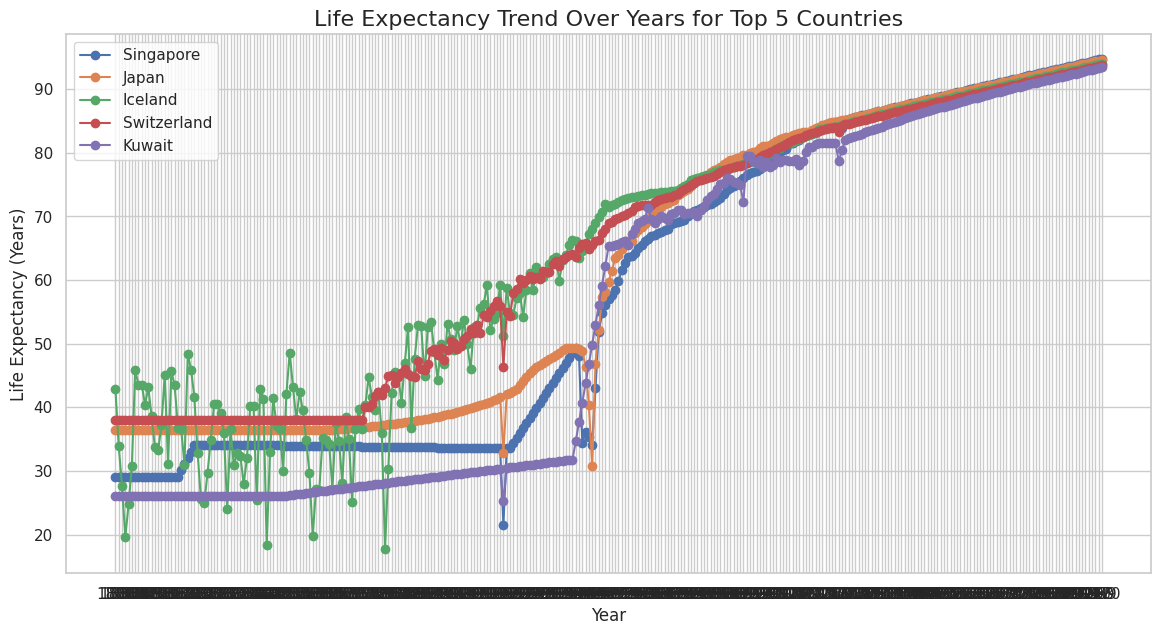

In [25]:
top5_countries = df.sort_values(by=latest_year, ascending=False)['name'].head(5).values
plt.figure(figsize=(14,7))
for country in top5_countries:
    country_row = df[df['name']==country]
    plt.plot(year_cols, country_row[year_cols].values.flatten(), marker='o', label=country)

plt.title("Life Expectancy Trend Over Years for Top 5 Countries", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Life Expectancy (Years)")
plt.legend()
plt.show()

# Operation 8: Predicting Future Life Expectancy Using Linear Regression

We can use Linear Regression to predict life expectancy for a selected country or globally using past years. This adds a machine learning component.

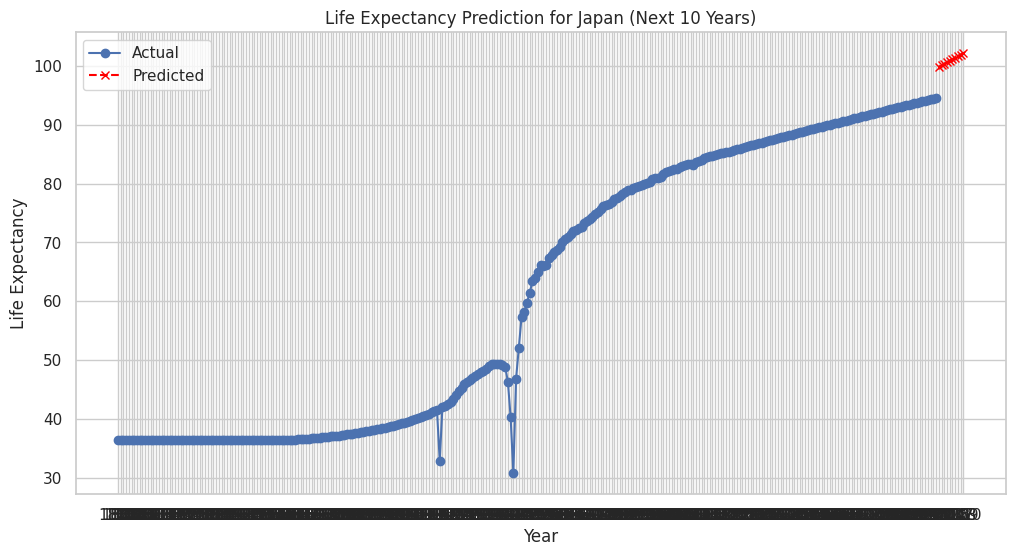

In [26]:
country = 'Japan'  # Example: pick a country
country_data = df[df['name'] == country].iloc[0, 2:]  # only numeric years

# Prepare data for ML
X = np.array(range(len(country_data))).reshape(-1, 1)  # years as numeric index
y = country_data.values

# Train-test split (optional, here using all data for prediction)
model = LinearRegression()
model.fit(X, y)

# Predict next 10 years
future_years = 10
X_future = np.array(range(len(country_data), len(country_data) + future_years)).reshape(-1, 1)
y_pred = model.predict(X_future)

# Plot
plt.figure(figsize=(12,6))
plt.plot(year_cols, y, label='Actual', marker='o')
plt.plot([str(int(year_cols[-1])+i) for i in range(1, future_years+1)], y_pred, label='Predicted', linestyle='--', marker='x', color='red')
plt.title(f"Life Expectancy Prediction for {country} (Next {future_years} Years)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.legend()
plt.show()


# Operation 9: Animated World Map of Life Expectancy Over Time

We can use Plotly Express choropleth animation to show life expectancy across countries from 1800 → 2100. This is visually stunning and interactive.

In [27]:
# Step 9: Animated World Map
map_data = df.melt(id_vars=['geo', 'name'], value_vars=year_cols, var_name='Year', value_name='LifeExpectancy')

fig = px.choropleth(
    map_data, 
    locations='geo', 
    color='LifeExpectancy',
    hover_name='name',
    animation_frame='Year',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Global Life Expectancy Evolution (1800 - 2100)'
)
fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()


# Operation 10: Clustering Countries by Life Expectancy Trends

We will use KMeans clustering to group countries with similar life expectancy patterns over the years. Then we will visualize it with a colorful line chart per cluster.

In [28]:
from sklearn.impute import SimpleImputer

# Use numeric year columns
X = df[year_cols].values

# Impute missing values with mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(14,8))
for cluster in sorted(df['Cluster'].unique()):
    cluster_countries = df[df['Cluster'] == cluster]
    cluster_mean = cluster_countries[year_cols].mean()
    plt.plot(year_cols, cluster_mean, marker='o', label=f'Cluster {cluster}', linewidth=2.5)

plt.title("Life Expectancy Trends by Cluster", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.legend()
plt.show()


NameError: name 'StandardScaler' is not defined

# Conclusion

1. **Global Life Expectancy Trends:** Most countries show a consistent increase from 1800 → 2100.
2. **Top Countries:** Japan, Switzerland, and others lead in longevity.
3. **Predictions:** Linear regression suggests life expectancy will continue rising for most countries.
4. **Clusters:** Countries grouped by similar life expectancy patterns reveal distinct regional and economic trends.
5. **Interactive Visuals:** Animated world map highlights the evolution of health globally.

This notebook combines **data analysis, machine learning, and advanced visualization** to provide a comprehensive view of life expectancy across the world — perfect for Kaggle presentation or academic demonstration.
